In [2]:
import numpy as np
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.metrics import confusion_matrix


In [4]:
import sklearn

In [5]:
print(sklearn.__version__)

0.19.1


In [56]:
df = pd.read_csv("breast-cancer-wisconsin.data")
df.replace('?',-99999, inplace = True)
df.drop(['id'],1,inplace = True)

X = np.array(df.drop(['class'],1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size = 0.2)

clf = neighbors.KNeighborsClassifier()
clf.fit(X_train,y_train)

accuracy = clf.score(X_test, y_test)
print(accuracy)

example_measures = np.array([4,2,1,1,1,2,3,2,1])
example_measures = example_measures.reshape(1, -1)
prediction = clf.predict(example_measures)
print(prediction)


0.9714285714285714
[2]


# With IP prediction

In [27]:
df = pd.read_csv("Test_K_mean.data")

In [28]:
df['categories'] = df['categories'].replace(1,0)

In [29]:
df.dropna().to_csv("Test_K_means_2.data",index = False)

In [30]:
df = pd.read_csv("Test_K_means_2.data")

In [33]:
df['risk-factor'] = df['risk-factor'].replace(1.51325678497,-9999)

In [35]:
df.to_csv("Test.csv", index = False)

In [80]:
scaler = MinMaxScaler()
df[['src-ip']] = scaler.fit_transform(df[['src-ip']])

In [74]:
df

,src-ip,risk-factor,categories
0,7.067553e-30,1.000000,0
1,1.726869e-30,1.000000,0
2,6.171907e-30,1.000000,0
3,1.059704e-29,1.000000,0
4,4.720607e-30,1.000000,0
5,1.045790e-29,1.000000,0
6,7.388632e-30,1.000000,0
7,9.554672e-30,1.000000,0
8,1.844581e-30,5.700000,2
9,5.728032e-30,1.513257,0


In [7]:
df = pd.read_csv("Final-Normalized-Neumeric-Train(1500).csv")
X = np.array(df['src-ip']).reshape(-1, 1)
y = np.array(df['Categories'])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train,y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

y_test_pred = clf.predict(X_test)
confusion_matrix(y_test, y_test_pred)


0.9


array([[259,   6],
       [ 24,  11]])

In [ ]:
df

# Coded KNearest Neighbour

In [8]:
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
import warnings
from matplotlib import style
from collections import Counter
style.use('fivethirtyeight')

In [31]:
plot1=[1,3]
plot2 =[2,5]

euclidean_distance = sqrt( (plot1[0]-plot2[0])**2 + (plot1[1]-plot2[0])**2)
print(euclidean_distance)

1.4142135623730951


In [32]:
dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]

#[[plt.scatter(ii[0],ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]
#plt.scatter(new_features[0],new_features[1], s=100)
#plt.show()

def k_nearest_neighbour(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups')
        
        #knnalgos
        return vote_result

In [33]:
df = pd.read_csv("Test_K_mean.data")

In [34]:
df.values.tolist()

[[2390872136.0, 1.0, 0.0],
 [584179858.0, 1.0, 1.0],
 [2087885482.0, 1.0, 1.0],
 [3584858198.0, 1.0, 0.0],
 [1596927275.0, 1.0, 0.0],
 [3537787762.0, 1.0, 1.0],
 [2499489289.0, 1.0, 1.0],
 [3232235784.0, 1.0, 1.0],
 [624000638.0, 5.7, 2.0],
 [1937727665.0, 1.51325678497, 1.0],
 [770826095.0, 1.0, 0.0],
 [1741136134.0, 8.6, 2.0],
 [701774523.0, 1.51325678497, 1.0],
 [3232235778.0, 1.0, 1.0],
 [3580044050.0, 1.0, 1.0],
 [995991159.0, 1.0, 0.0],
 [1856733178.0, 1.0, 0.0],
 [2031107992.0, 1.0, 1.0],
 [1497369295.0, 5.7, 2.0],
 [1342433871.0, 1.0, 0.0],
 [693811825.0, 1.0, 0.0],
 [630064787.0, 5.7, 2.0],
 [1730546718.0, 4.3, 2.0],
 [1914893240.0, 1.0, 1.0],
 [1975959884.0, 5.7, 2.0],
 [1886908382.0, 1.0, 1.0],
 [96319801.0, 1.0, 1.0],
 [1968255870.0, 5.7, 2.0],
 [1758417666.0, 1.0, 1.0],
 [1942031256.0, 1.0, 1.0],
 [1395432144.0, 1.0, 1.0],
 [2944934710.0, 1.0, 0.0],
 [995824110.0, 5.7, 2.0],
 [1387452060.0, 1.0, 0.0],
 [1742865720.0, 1.0, 0.0],
 [2104477220.0, 1.0, 0.0],
 [2120149835.0, 1.

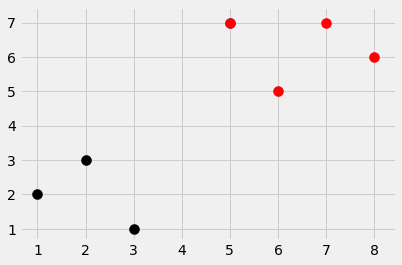

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter
style.use('fivethirtyeight')

def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
        
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance,group])

    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result

dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]
[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]
# same as:
##for i in dataset:
##    for ii in dataset[i]:
##        plt.scatter(ii[0],ii[1],s=100,color=i)
        
plt.scatter(new_features[0], new_features[1], s=100)

result = k_nearest_neighbors(dataset, new_features)
plt.scatter(new_features[0], new_features[1], s=100, color = result)  
plt.show()

In [36]:
import numpy as np

import warnings
from collections import Counter
#dont forget this
import pandas as pd
import random
style.use('fivethirtyeight')



In [37]:
def k_nearest_neighbors(data, predict, k=5):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance,group])
    votes = [i[1] for i in sorted(distances)[:k]]
    
    print(Counter(votes).most_common(1)[0][0])
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result



In [38]:
df = pd.read_csv('breast-cancer-wisconsin.data')

df.replace('?',-99999, inplace=True)
df.drop(['id'], 1, inplace=True)
full_data = df.astype(float).values.tolist()


In [39]:
random.shuffle(full_data)


test_size = 0.2
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

for i in train_data:
    train_set[i[-1]].append(i[:-1])

for i in test_data:
    test_set[i[-1]].append(i[:-1])



In [40]:
correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set, data, k=5)
        if group == vote:
            correct += 1
        total += 1
        


2
2
2
2
2
4
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
4
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
2
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
2
4
4
4
4
4
4
4
4
4
4
4
4


In [41]:
float(correct)/float(total)

0.9712230215827338

In [21]:
df = pd.read_csv("Final-Normalized-Neumeric-Train(1500).csv")

In [23]:
df

,src-ip,risk-factor,Categories
0,7.067553e-30,0.999910,0.0
1,1.726869e-30,0.999910,0.0
2,6.171907e-30,0.999910,0.0
3,1.059704e-29,0.999910,0.0
4,4.720607e-30,0.999910,0.0
5,1.045790e-29,0.999910,0.0
6,7.388632e-30,0.999910,0.0
7,9.554672e-30,0.999910,0.0
8,1.844581e-30,0.999957,1.0
9,5.728032e-30,0.000000,0.0


In [28]:
df.drop(columns ='risk-factor').to_csv("Train-1feature.csv",index = False)

In [29]:
import numpy as np
from math import sqrt
import warnings
from collections import Counter
import pandas as pd
import random

def k_nearest_neighbors(data, predict, k=5):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance, group])

    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / k
    #print(float(confidence))
  
    return vote_result, confidence


df = pd.read_csv("Train-1feature.csv")
#df.replace('?',-99999, inplace=True)
#df.drop(['id'], 1, inplace=True)
full_data = df.astype('float').values.tolist()
random.shuffle(full_data)

test_size = 0.2
train_set = {0:[], 1:[]}
test_set = {0:[], 1:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[int(test_size*len(full_data)):]

for i in train_data:
    train_set[i[-1]].append(i[:-1])
    
for i in test_data:
    test_set[i[-1]].append(i[:-1])

correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote,confidence = k_nearest_neighbors(train_set, data, k=7)
        if group == vote:
            correct += 1
        total += 1
print('Accuracy:', float(correct)/float(total))

('Accuracy:', 0.8833333333333333)


In [30]:
a='192.168.0.1'

In [ ]:
s = Con

In [31]:
a = [1,5.7,10,4.3]

In [39]:
random.choice(a)

4.3